In [6]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
    os.chdir(os.path.join(os.getcwd(), '..'))
except:
    pass

 # SFS feature selection

In [7]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from pybalu.performance_eval import performance
from pybalu.classification import structure
from pybalu.feature_selection import sfs
from pybalu.feature_transformation import normalize
from pybalu.data_selection import stratify
from scipy.io import loadmat

 ## Matplotlib setup
 The following code is used to set up the default parameters for all the
 plots shown by matplotlib

In [8]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (7, 7)
matplotlib.rcParams["axes.titlesize"] = 20
matplotlib.rcParams["axes.titlepad"] = 15
matplotlib.rcParams["figure.figsize"] = (7, 7)
del matplotlib

 ## Loading classification data
 A dataset with features already extracted is loaded.

 This dataset consists of 810 samples and 294 features.
 Two types of class are defined (0 and 1) with 405 samples
 each.

In [9]:
data = loadmat("feature_selection/realdata")
features = data["features"]
classes = data["classes"].squeeze()

FileNotFoundError: [Errno 2] No such file or directory: 'feature_selection/realdata.mat'

 ## Dataset separation for training and testing
 The dataset is separated into two diferent categories:
 90% for training and 10% for testing.

In [5]:
idx_train, idx_test = stratify(classes, .90)
f_train = features[idx_train]
c_train = classes[idx_train]
f_test = features[idx_test]
c_test = classes[idx_test]

 ## Feature normalization
 Features are normalized for better (?) sfs performance

In [6]:
f_train_norm, a, b = normalize(f_train)
f_test_norm = f_test * a + b

 ## Feature selection

In [7]:
N_FEATURES = 15

selected_feats = sfs(f_train_norm, c_train, n_features=N_FEATURES,
                     method="fisher", show=True)

Selecting Features: 100%|██████████| 15.0/15.0 [00:01<00:00, 9.44 features/s]


 ## Performance evaluation
 Feature selection is evaluated iteratively for each subset of
 1, 2, ..., 15 best features

 Data is classified using a K Nearest Neighbors classifier
 using 3 neighbors

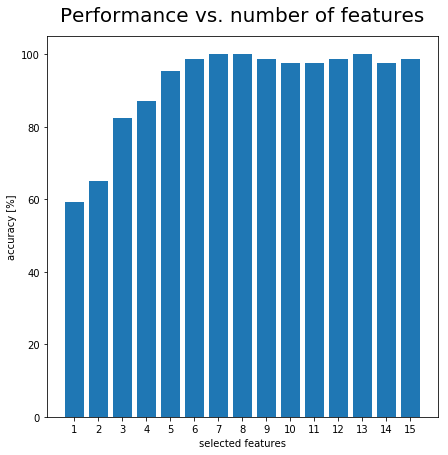

In [8]:
def performance_for_features(feat_idxs):
    # train classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(f_train_norm[:, feat_idxs], c_train)

    # predict and evaluate performance
    prediction = knn.predict(f_test_norm[:, feat_idxs])
    return performance(prediction, c_test)


values = [performance_for_features(selected_feats[:i]) * 100
          for i in range(1, N_FEATURES + 1)]

plt.bar(*zip(*enumerate(values)), tick_label=range(1, N_FEATURES+1))
plt.title("Performance vs. number of features")
plt.xlabel('selected features')
plt.ylabel('accuracy [%]')
plt.show()